############################################################
### This file is used to generate Table 1-3, Fig 1 ###
############################################################

- [Verify Assumption 1](#Verify-Assumption-1)
    - [Table 1](#Table-1)
    - [Table 2](#Table-2)

- [Verify Assumption 2](#Verify-Assumption-2)
    - [Table 3](#Table-3)
    - [Left plot in Figure 1](#Left-plot-in-Figure-1)
    - [Middle plot in Figure 1](#Middle-plot-in-Figure-1)
    - [Right plot in Figure 1](#Right-plot-in-Figure-1)

In [1]:
import os
import numpy as np
from scipy.stats import norm
from scipy.stats import gaussian_kde as kde 
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
####### Plot Formatting ######
plt.rc('lines', linewidth = 4)
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.rc('legend',fontsize=17)
# plt.rcParams["font.family"] = "serif"
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['lines.markersize'] = 6
plt.rcParams['figure.figsize'] = (7.0, 5.0)

An almost example

* $\Lambda=[-1,1]$.

* $Q(\lambda) = \lambda^p$ for $p=5$.

* $\mathcal{D} = Q(\Lambda) = [-1,1]$.

___

* $\pi_{\Lambda}^{init} \sim U([-1,1])$

* $\pi_{\mathcal{D}}^{obs} \sim N(0.25,0.1^2)$

* $\pi_{\mathcal{D}}^{Q(init)}$ 

In [3]:
def QoI(lam,p): 
    '''Defing a QoI mapping function'''
    q = lam**p
    return q

def QoI_approx(lam,p,n):
    '''Definie a QoI approximation with n+2 knots for piecewise linear spline'''
    lam_knots = np.linspace(-1,1,n+2)
    q_knots = QoI(lam_knots,p)
    q = np.interp(lam, lam_knots, q_knots)
    return q

In [4]:
# number of samples from init and observed mean (mu) and std (sigma)
N, mus, sigma = int(1E5), [0.5,0.25,1], 0.1 
lam = np.random.uniform(low=-1,high=1,size=N) # sample set of the init

qvals_nonlinear = QoI(lam,5) # Evaluate lam^5 samples

# Estimate the push-forward density for the QoI
q_nonlinear_kde = kde(qvals_nonlinear)

# Verify Assumption 1

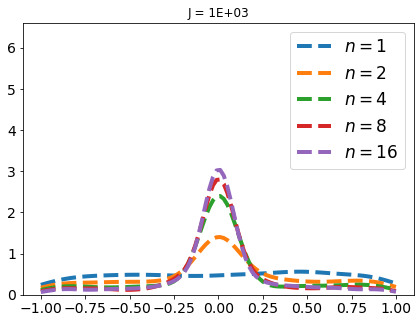

In [5]:
#### Use plot to show approximate pushforward #####
fig = plt.figure()
J = int(1E3)
qplot = np.linspace(-1,1, num=100)

lam = np.random.uniform(low=-1,high=1,size=J) # sample set of the init

# Evaluate the QoI map on this init sample set
#qvals_nonlinear = QoI(lam,5) # Evaluate lam^5 samples
for n in [1,2,4,8,16]:
    qvals_approx_nonlinear = QoI_approx(lam,5,n) # Evaluate lam^5 samples
    # Estimate the push-forward density for the QoI
    q_nonlinear_kde1 = kde( qvals_approx_nonlinear )
    pf_init_approx_plot = plt.plot(qplot,q_nonlinear_kde1(qplot),'--', linewidth=4, label="$n=$" + str(n))

plt.title('J = %1.0E' %(J)) 
plt.ylim([0,6.6])
plt.legend();
# fig.savefig("images/concept_example_pf_approxes_J_1E3")

In [6]:
# Failing Lipschitz as a function of approximate map

fig = plt.figure()
def plot_func(n,J):
    fig.clear()
    qplot = np.linspace(-1,1, num=100)
    #observed_plot = plt.plot(qplot,norm.pdf(qplot, loc=mu, scale=sigma), 'r-', linewidth=4, label="$\pi_\mathcal{D}^{obs}$")
    pf_init_plot = plt.plot(qplot,1/10*np.abs(qplot)**(-4/5),'b-', linewidth=4, label="$\pi_\mathcal{D}^{Q(init)}$")

    np.random.seed(123456)
    lam = np.random.uniform(low=-1,high=1,size=J) # sample set of the init
    # Evaluate the QoI map on this init sample set
    qvals_approx_nonlinear = QoI_approx(lam,5,n) # Evaluate lam^5 samples

    # Estimate the push-forward density for the QoI
    q_nonlinear_kde = kde( qvals_approx_nonlinear )
    
    pf_init_approx_plot = plt.plot(qplot,q_nonlinear_kde(qplot),'b--', linewidth=4, label="$\pi_{\mathcal{D},N}^{Q(init)}$")
    
    plt.title('Lipschitz const. = %4.2f and Bound = %2.2f' %(np.max(np.abs(np.gradient(q_nonlinear_kde(qplot), qplot))),
                                                                             np.max(q_nonlinear_kde(qplot))));
interact(plot_func, 
         n = widgets.IntSlider(value=int(1),min=int(0),max=int(1E2),step=1),
         J = widgets.IntSlider(value=int(1E3), min=int(1E3), max=int(1E5), step=int(1E3)))

<Figure size 504x360 with 0 Axes>

interactive(children=(IntSlider(value=1, description='n'), IntSlider(value=1000, description='J', max=100000, …

<function __main__.plot_func(n, J)>

In [7]:
##### Generate data in Table 1 and 2 #####
def assumption1(n, J):
    np.random.seed(123456)
    x = np.linspace(-1, 1, 100)
    lam = np.random.uniform(low=-1, high=1, size=J)  # sample set of the init
    qvals_approx_nonlinear = QoI_approx(lam, 5, n)  # Evaluate lam^5 samples
    q_nonlinear_kde = kde(qvals_approx_nonlinear)
    return np.round(np.max(np.abs(np.gradient(q_nonlinear_kde(x), x))), 2), np.round(np.max(q_nonlinear_kde(x)), 2)


size_J = [int(1E3), int(1E4), int(1E5)]
degree_n = [1, 2, 4, 8, 16]
Bound_matrix, Lip_Bound_matrix = np.zeros((3, 5)), np.zeros((3, 5))
for i in range(3):
    for j in range(5):
        n, J = degree_n[j], size_J[i]
        Lip_Bound_matrix[i, j] = assumption1(n, J)[0]
        Bound_matrix[i, j] = assumption1(n, J)[1]

## Table 1

In [8]:
###########################################
############## Table 1 ##################
###########################################
print('Table 1')        
print('Bound under certain n and J values')
print(Bound_matrix)

Table 1
Bound under certain n and J values
[[0.54 1.52 2.5  2.94 3.19]
 [0.53 2.09 3.42 4.1  4.43]
 [0.51 3.03 4.44 5.63 6.12]]


## Table 2

In [9]:
###########################################
############## Table 2 ##################
###########################################
print('Table 2')
print('Lipschitz bound under certain n and J values')
print(Lip_Bound_matrix)

Table 2
Lipschitz bound under certain n and J values
[[ 1.41  6.08 13.68 17.98 20.81]
 [ 2.19 13.89 27.26 38.35 44.06]
 [ 3.48 33.14 46.45 75.08 89.42]]


# Verify Assumption 2

In [10]:
#### Use plot to show the difference between the observed and approximate pushforward #####
#### m: case number; n: approximate map index; J: sample size ####
fig = plt.figure()

def plot_func(n, J, m):
    fig.clear()
    
    qplot = np.linspace(-1,1, num=100)
    observed_plot = plt.plot(qplot,norm.pdf(qplot, loc=mus[m], scale=sigma), 'r-', linewidth=4, label="$\pi_\mathcal{D}^{obs}$")    

    np.random.seed(123456)   
    lam = np.random.uniform(low=-1,high=1,size=J) # sample set of the init
    
    # Evaluate the QoI map on this init sample set
    qvals_approx_nonlinear = QoI_approx(lam,5,n) # Evaluate lam^5 samples
    # Estimate the push-forward density for the QoI
    q_nonlinear_kde = kde(qvals_approx_nonlinear)  
    # Plot Aproximate push forward
    pf_init_approx_plot = plt.plot(qplot,q_nonlinear_kde(qplot),'b--', linewidth=4, label="$\pi_{\mathcal{D}}^{Q_n(init)}$")    
    obs_vals_nonlinear = norm.pdf(qvals_approx_nonlinear, loc=mus[m], scale=sigma)
    
    # Compute r
    r = np.divide(obs_vals_nonlinear,q_nonlinear_kde(qvals_approx_nonlinear))    
    plt.title('$\mathbb{E}(r) =$ %3.2f' %(np.mean(r)))    
    plt.legend();
    
interact(plot_func, 
         n = widgets.IntSlider(value=int(1),min=int(0),max=int(1E2),step=1),
         J = widgets.IntSlider(value=int(1E4), min=int(1E3), max=int(1E5), step=int(1E3)),
         m = widgets.IntSlider(vlaue=int(0),min=int(0),max=int(2), step=1))

<Figure size 504x360 with 0 Axes>

interactive(children=(IntSlider(value=1, description='n'), IntSlider(value=10000, description='J', max=100000,…

<function __main__.plot_func(n, J, m)>

In [11]:
# The expected r value
def Meanr(n, J, m):
    '''
    n: index of approximating mapping
    J: sample size of sample generated from parameter space
    m: index of mu
    '''
    np.random.seed(123456)
    lam = np.random.uniform(low=-1, high=1, size=J)  # sample set of the init
    qvals_approx_nonlinear = QoI_approx(lam, 5, n)  # Evaluate lam^5 samples
    q_nonlinear_kde = kde(qvals_approx_nonlinear)
    obs_vals_nonlinear = norm.pdf(qvals_approx_nonlinear, loc=mus[m], scale=sigma)
    r = np.divide(obs_vals_nonlinear, q_nonlinear_kde(qvals_approx_nonlinear))
    return np.round(np.mean(r), 2)


meanr_matrix = np.zeros((3, 5))
for i in range(3):
    for j in range(5):
        J = int(1E4)
        meanr_matrix[i, j] = Meanr(degree_n[j], J, i)

## Table 3

In [12]:
###########################################
############## Table 3 ##################
###########################################
print('Table 3')
print('Expected ratio for verifying Assumption 2')
print(meanr_matrix)

Table 3
Expected ratio for verifying Assumption 2
[[1.   1.   1.   0.98 0.99]
 [0.99 0.88 0.85 0.92 0.92]
 [0.69 0.66 0.63 0.61 0.61]]


In [13]:
#### To make it cleaner, create Directory "images" to store all the figures ####
imagepath = os.path.join(os.getcwd(),"images")
os.makedirs(imagepath,exist_ok=True)

In [14]:
fig = plt.figure()

def plot_all(i):
    fig.clear()
    case = ['Case I', 'Case II', 'Case III']
    qplot = np.linspace(-1, 1, num=100)
    observed_plot = plt.plot(qplot, norm.pdf(
        qplot, loc=mus[i], scale=sigma), 'r-', label="$\pi_\mathcal{D}^{obs}$")
    pf_init_plot = plt.plot(qplot, 1/10*np.abs(qplot)**(-4/5), 'b-',
                             label="$\pi_\mathcal{D}^{Q(init)}$")
    pf_init_plot = plt.plot(qplot, q_nonlinear_kde(qplot), 'b--',
                             label="$\pi_{\mathcal{D},J}^{Q(init)}$")
    plt.xlim([-1, 1])
    plt.xlabel("$\mathcal{D}$")
    plt.legend()
    plt.title(case[i],size=15);
    loc = ['Left','Mid','Right']
    if loc[i]:
        filename = os.path.join(os.getcwd(), "images", "Fig1(%s).png"%(loc[i])) 
        plt.savefig(filename)

<Figure size 504x360 with 0 Axes>

## Left plot in Figure 1

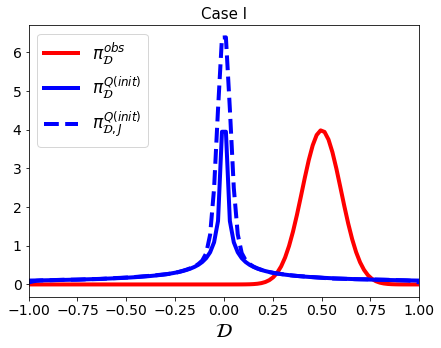

In [15]:
###########################################
####### The left plot of Fig 1 ##########
###########################################
plot_all(0)

## Middle plot in Figure 1

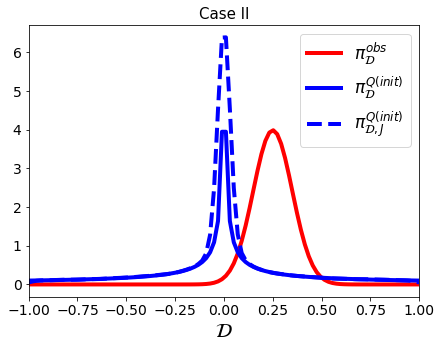

In [16]:
#############################################
####### The middle plot of Fig 1 ##########
#############################################
plot_all(1)

## Right plot in Figure 1

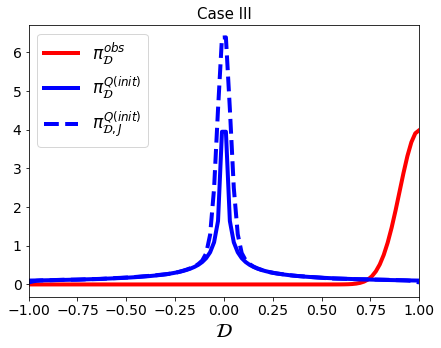

In [17]:
############################################
####### The right plot of Fig 1 ##########
############################################
plot_all(2)